## 混同行列によってそのモデルの傾向をつかむ
- TP(真陽性)
予測ラベルが陽性、正解ラベルが陽性
- FP(偽陽性)
予測ラベルが陽性、正解ラベルが陰性
- FN(偽陰性)
予測ラベルが陰性、正解ラベルが陽性
※病気だとここが危険
- TN(真陰性)
予測ラベルが陰性、正解ラベルが陰性

In [16]:
#混同行列を出力してみる
# 必要なライブラリを読込
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [17]:
# versicolorとversinicaの二値分類をする
#　線形分離不可能
from sklearn.datasets import load_iris
iris = load_iris()
X_1 = iris.data[50:, [0, 2]]
y_1 = iris.target[50:]

# データセットの分割
from sklearn.model_selection import train_test_split
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear', C=1.0)
svc_1.fit(X_1_train, y_1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
# sklearnのconfusion_matrixで出力できる
# 混合行列のarrayを作成
# (正解ラベル, 予測ラベル)
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_1_test, svc_1.predict(X_1_test))
cm_1

array([[13,  2],
       [ 1, 14]])

In [19]:
# 混合行列をグラフでプロットする関数
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

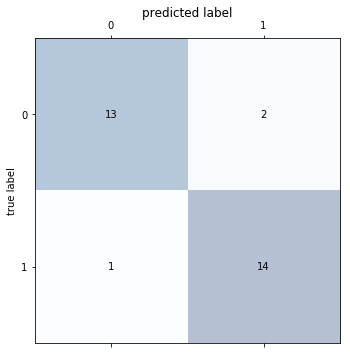

In [20]:
# 混同行列をグラフでプロット
plot_cm(cm_1)

病気では偽陰性が最も危険なので再現率としてTP/(TP+FN)を定義する
FNが小さくなるほど小さくなる

In [22]:
from sklearn import metrics
metrics.accuracy_score(y_1_test, svc_1.predict(X_1_test)) #引数の与え方は正解ラベル、予測ラベルの順

0.90000000000000002

１％の人しかかからない病気の識別器が、どんな入力でも陰性と予測するものだったとしても、正答率は99%になってしまう。<br>
実際は学習の時に各クラスのデータが半々くらいになるようにするから大丈夫なはず？

### 再現率(陽性であるサンプルをどれだけ見抜けたか)=TP/(TP+FN)=正しく陽性と予測したもの/サンプル中の陽性全て

In [23]:
metrics.recall_score(y_1_test,svc_1.predict(X_1_test))

0.8666666666666667

### 適合率(陽性と判定した結果がどれほど信頼できるか)=TP/(TP+FP)=正しく陽性と予測したもの/陽性と予測したもの

In [24]:
metrics.precision_score(y_1_test,svc_1.predict(X_1_test))

0.9285714285714286

### F値(再現率と適合率のバランスを取ったもの)
全てを陽性と予測すればFNが小さくなって再現率が上がる。全てを陰性と予測すればFPが小さくなって適合率が上がる。<br>
どちらかだけでは妥当なモデルかどうかわからない。よって両方を考慮した指標が必要となる。

In [25]:
metrics.f1_score(y_1_test, svc_1.predict(X_1_test))

0.89655172413793105

## 多クラス分類への応用

In [26]:
# 3クラス分類を実行する
iris = load_iris()
X_2 = iris.data[:, [0, 2]]
y_2 = iris.target

# データセットの分割
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

# 線形SVCの学習
from sklearn.svm import SVC
svc_2 = SVC(kernel='linear', C=1.0)
svc_2.fit(X_2_train, y_2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
# 混合行列の作成
# arrayで出力
cm_2 = confusion_matrix(y_2_test, svc_2.predict(X_2_test))
cm_2

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 10]])

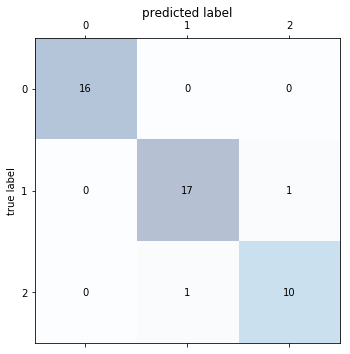

In [29]:
plot_cm(cm_2)

多クラス分類の場合、クラスごとのサンプル数の偏りを考慮するかしないかで
- ミクロ平均(偏りを考慮しない)---サンプルの少ないクラスは軽視される。
- マクロ平均(偏りを考慮する)---サンプルの少ないクラスも同等に扱う。

に分かれる。

例）ミクロの場合<br>
TPのところをTP0+...+TPnに置き換える。他も同様

例）マクロの場合<br>
各評価指標をクラスごとに求めて、最後にそれらをクラス数で割る。

In [30]:
# 適合率のマクロ平均
metrics.precision_score(y_2_test, svc_2.predict(X_2_test), average='macro')

0.95117845117845112

In [31]:
# 再現率のマクロ平均
metrics.recall_score(y_2_test, svc_2.predict(X_2_test), average='macro')

0.95117845117845112

In [32]:
# F値のマクロ平均を出力
# averageの指定必須
metrics.f1_score(y_2_test, svc_2.predict(X_2_test), average='macro')

0.95117845117845112

## ホールドアウト法の問題点とKfold法

ホールドアウト法では汎化性能の評価がtrain_test_split一回の結果に依存してしまうためテストデータの取り方によってはうまく測れない。

In [33]:
# データセットの読み込み
from sklearn.datasets import load_boston
boston = load_boston()

# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
# 変数を格納
# 説明変数: LSTAT, RM
X_3 = df.loc[:, ['LSTAT', 'RM']].values
y_3 = df.loc[:, ['MEDV']].values

In [35]:
# 線形回帰のインスタンスを生成
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [36]:
# データの分割方法を指定
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)　#分割数、シャッフルするかどうか、

### cross_val_score

モデルの形式、データ、データの分割方法を与えると、データの分割方法に従って勝手に学習、テスト精度の評価までを行ってくれる。<br>
しかし**model.fit(X_train,y_train)**をやっているわけではないので、与えたモデルが学習をするわけではない。<br>
学習済みモデルを利用するには**別途でfit( )を行う必要がある**。

In [37]:
# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(lr, X_3, y_3, cv=kf_3)
scores_3 #出力はtestデータを入れ替えた場合全てなのでn_split分ある。

array([ 0.54090848,  0.70922084,  0.57458547,  0.55307476,  0.738459  ])

In [39]:
#平均をとると精度の平均が得られる。
scores_3.mean()

0.62324971110773009

In [40]:
#標準偏差を出すとtestデータの取り方でtest精度がどれほど変わるかがわかる
# 交差検証精度の標準偏差を出力
scores_3.std()

0.083351095185182217

## 層化交差検証法
分割したデータのまとまりそれぞれに含まれるクラスの比率が等しくなるように分割する方法。<br>
分類問題に適している分割方法。回帰では通常のクロスバリデーション、分類ではこっちを使うのが好まれる。

In [41]:
# irisデータセットの読み込み
# 変数: petal length, petal width
from sklearn.datasets import load_iris
iris = load_iris()
X_4 = iris.data[:,[2,3]]
y_4 = iris.target

In [43]:
# SVMのインスタンスを生成
from sklearn.svm import SVC
svc_4 = SVC(kernel='rbf', gamma=0.1, C=1.0)

In [45]:
from sklearn.model_selection import StratifiedKFold
kf_4=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

In [50]:
from sklearn.model_selection import cross_val_score
scores_4 = cross_val_score(svc_4, X_4, y_4, cv=kf_4)
scores_4 #精度高い

array([ 0.93333333,  0.93333333,  1.        ,  0.96666667,  1.        ])

In [51]:
# 交差検証精度の平均を出力
scores_4.mean()

0.96666666666666679

In [52]:
# 交差検証精度の標準偏差を出力
scores_4.std() #ばらつきが少ない

0.029814239699997188

## グリッドサーチで最適なハイパーパラメータを求める
グリッドサーチクラスのインスタンスは学習済みモデルとして振る舞え、predict(X)などができる。

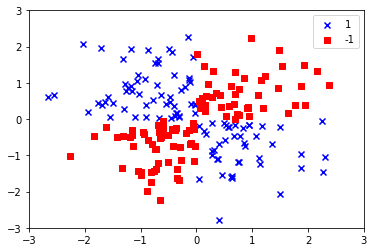

In [53]:
# XORのデータの作成
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

# データのプロット
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [54]:
# ホールド・アウト法による分割
X_xor_train, X_xor_test, y_xor_train, y_xor_test = train_test_split(X_xor, y_xor, test_size=0.3, random_state=0)

In [55]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [56]:
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [59]:
#グリッドサーチをしたいモデルをGridSerchCVの引数にして宣言
# CV=CrossValidation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
gs_svc=GridSearchCV(SVC(),param_grid=param_grid,cv=kf_5)

In [60]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
# trainデータをfit処理で内部的に行う。
gs_svc.fit(X_xor_train, y_xor_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

### 最適なモデルの確認
最適解がグリッドの内側にあるようにする。

In [61]:
# test精度の平均が最も高かった組み合わせを出力
gs_svc.best_params_

{'C': 1000, 'gamma': 0.1}

In [70]:
# そのときのtest精度の平均を出力
# 学習データ内でtestデータ(validation_data)を変えた時の精度
# cross_val_scoreと同等
gs_svc.best_score_

0.97142857142857142

In [73]:
#学習に使っていないデータで予測
# ホールド・アウト法によるtest精度を出力
gs_svc.score(X_xor_test, y_xor_test)

0.96666666666666667

In [65]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

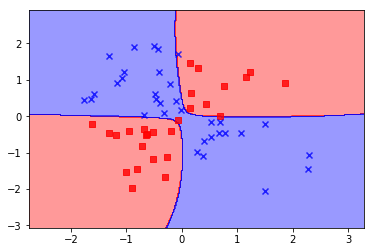

In [66]:
plot_decision_regions(X_xor_test,y_xor_test,gs_svc)